In [3]:
import pandas as pd
data=pd.read_csv('Advertising.csv' , index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


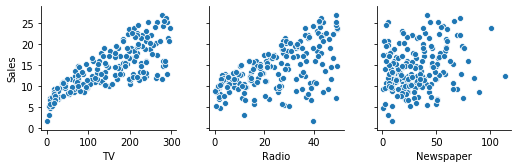

In [9]:
# visualizing our datas
import seaborn as sns
%matplotlib inline
sns.pairplot(data , x_vars = ['TV' , 'Radio' , 'Newspaper'] , y_vars = ['Sales'])

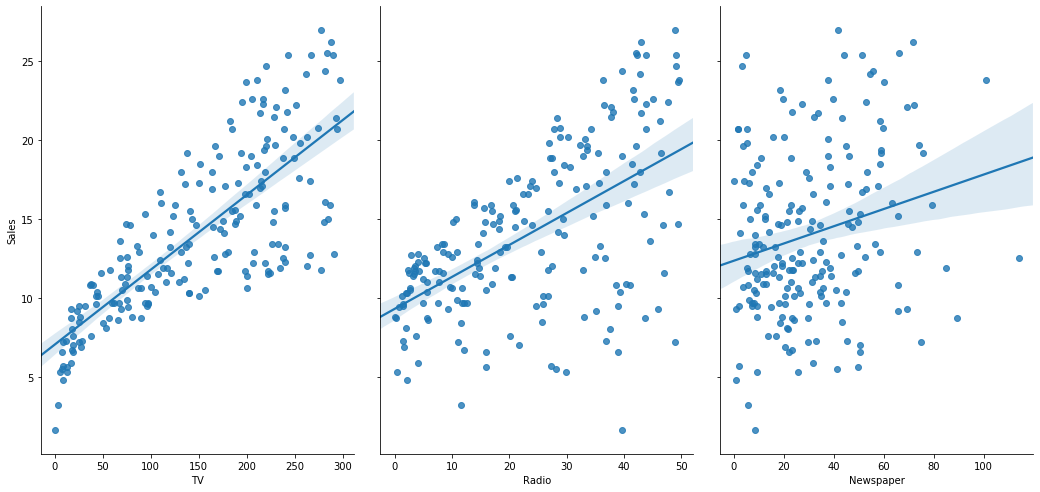

In [11]:
# as u see the size and the aspect ratio is very small 
sns.pairplot(data , x_vars = ['TV' , 'Radio' , 'Newspaper'] , y_vars = ['Sales'] , size = 7 , aspect = 0.7 , kind = 'reg')

In [14]:
# Preparing X and Y for linear regression
X=data[['TV' , 'Radio' , 'Newspaper']]
y=data['Sales']
print(X.shape , y.shape)

(200, 3) (200,)


In [15]:
print(type(X) , type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [18]:
# Split X and y for training and testing dataset
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X,y , random_state =1)
# we use the default test size which is 75% by 25%
print(X_train.shape , X_test.shape)

(150, 3) (50, 3)


In [20]:
print(y_train.shape , y_test.shape)

(150,) (50,)


In [21]:
# now lets fit in to the linear regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression() # leave the default parameter
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# lets fit the training dataset
linreg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print (linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [30]:
feature_cols = ['Tv' , 'Radio' , 'Newspaper']
zip(feature_cols ,  linreg.coef_)

In [31]:
# MAKING PREDICTIONS
y_pred=linreg.predict(X_test)

# Model Evaluation

In [32]:
# as classifcation problems we used classification metrics but for regresssion these doesnt work because of its continuosity
# 1) Mean Absolute Error(MAE)
true = [100 , 50 , 30 , 20]
predict = [90 , 50 , 50 , 30]



In [34]:
# mean absolute error at hand
print((10 + 0 + 20 + 10) / 4)
# we can also do it on scikit learn
from sklearn import metrics
mae=metrics.mean_absolute_error(true , predict)
print(mae)

10.0
10.0


In [35]:
# 2) mean squared error (MSE)
# mean squared error at hand
print((10**2 + 0 + 20**2 + 10**2)/4)

# we can also do it on the scikit learn
MSE=metrics.mean_squared_error(true , predict)
print(MSE)

150.0
150.0


In [39]:
# 3) Root mean squared error(RMSE)
# RMSE at hand
import numpy as np
np.sqrt((10**2 + 20**2 + 10**2) / 4)

# we can aslo do in scikit learn
print(np.sqrt(metrics.mean_squared_error(true , predict)))

12.24744871391589


In [40]:
# now lets evaluate our model by using RMSE
RMSE_real=np.sqrt(metrics.mean_squared_error(y_test , y_pred))
RMSE_real

1.4046514230328953

In [42]:
# HOW WE CAN SELECT OUR BEST FEATURE , lets remove the news paper and calculate the ammount of RMSE
X = data[['TV' , 'Radio']]
y = data['Sales']

# train and test
X_train , X_test , y_train , y_test=train_test_split(X,y,random_state=1)
# fit the model
linreg.fit(X_train , y_train)
# predict by the testing set
y_pred=linreg.predict(X_test)

# checking the model evaluation using RMSE
KMSE_REAL = np.sqrt(metrics.mean_squared_error(y_test , y_pred))
KMSE_REAL


1.3879034699382886